# Setup

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option("display.max_colwidth", None)

import text_cleaning as tc # custom script for text cleaning

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


# Load data
We use the <a href="https://www.kaggle.com/datasets/andrewmvd/cyberbullying-classification">Cyberbullying Classification</a> dataset from Kaggle

## Content

* **tweet_text** - Text of the tweet
* **cyberbullying_type** - Type of cyberbullying harassment.


In [5]:
tweets_df = pd.read_csv("../data/raw/cyberbullying_tweets.csv")
tweets_df

,tweet_text,cyberbullying_type
0,"In other words #katandandre, your food was crapilicious! #mkr",not_cyberbullying
1,Why is #aussietv so white? #MKR #theblock #ImACelebrityAU #today #sunrise #studio10 #Neighbours #WonderlandTen #etc,not_cyberbullying
2,@XochitlSuckkks a classy whore? Or more red velvet cupcakes?,not_cyberbullying
3,"@Jason_Gio meh. :P thanks for the heads up, but not too concerned about another angry dude on twitter.",not_cyberbullying
4,"@RudhoeEnglish This is an ISIS account pretending to be a Kurdish account. Like Islam, it is all lies.",not_cyberbullying
...,...,...
47687,"Black ppl aren't expected to do anything, depended on for anything. Yet free to participate, work, enjoy the freedom of humans all across this globe. If you waste your energy on the past you will be wasting it for building the future.",ethnicity
47688,Turner did not withhold his disappointment. Turner called the court an “abominable conclave of negro hating demons” (with one exception) who “issued another decree that colored men and women must be driven into Jim Crow cars whenever it suits the whim of any white community.”,ethnicity
47689,I swear to God. This dumb nigger bitch. I have got to bleach my hair reeeeeal fuckin' soon. D:&lt; FUCK.,ethnicity
47690,"Yea fuck you RT @therealexel: IF YOURE A NIGGER FUCKING UNFOLLOW ME, FUCKING DUMB NIGGERS.",ethnicity


In [6]:
tweets_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47692 entries, 0 to 47691
Data columns (total 2 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   tweet_text          47692 non-null  object
 1   cyberbullying_type  47692 non-null  object
dtypes: object(2)
memory usage: 745.3+ KB


In [7]:
tweets_df.isnull().sum()

tweet_text            0
cyberbullying_type    0
dtype: int64

<Axes: xlabel='count', ylabel='cyberbullying_type'>

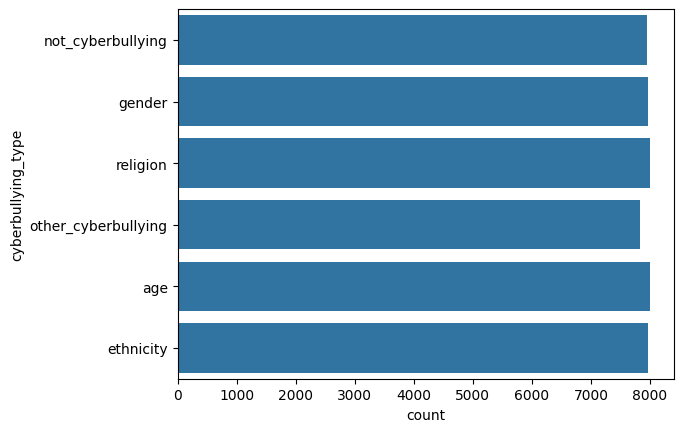

In [8]:
sns.countplot(data=tweets_df, y="cyberbullying_type")

# Data cleaning

In [9]:
# Clean tweet text
tweets_df["clean_text"] = tweets_df["tweet_text"].apply(tc.clean_data)

In [10]:
tweets_df[['tweet_text', 'clean_text']]

,tweet_text,clean_text
0,"In other words #katandandre, your food was crapilicious! #mkr",word #katandandre food crapilicious #mkr
1,Why is #aussietv so white? #MKR #theblock #ImACelebrityAU #today #sunrise #studio10 #Neighbours #WonderlandTen #etc,#aussietv white #mkr #theblock #imacelebrityau #today #sunrise #studio #neighbours #wonderlandten #etc
2,@XochitlSuckkks a classy whore? Or more red velvet cupcakes?,classy whore red velvet cupcake
3,"@Jason_Gio meh. :P thanks for the heads up, but not too concerned about another angry dude on twitter.",meh p thanks head concerned another angry dude twitter
4,"@RudhoeEnglish This is an ISIS account pretending to be a Kurdish account. Like Islam, it is all lies.",isi account pretending kurdish account like islam lie
...,...,...
47687,"Black ppl aren't expected to do anything, depended on for anything. Yet free to participate, work, enjoy the freedom of humans all across this globe. If you waste your energy on the past you will be wasting it for building the future.",black ppl expected anything depended anything yet free participate work enjoy freedom human across globe waste energy past wasting building future
47688,Turner did not withhold his disappointment. Turner called the court an “abominable conclave of negro hating demons” (with one exception) who “issued another decree that colored men and women must be driven into Jim Crow cars whenever it suits the whim of any white community.”,turner withhold disappointment turner called court abominable conclave negro hating demon one exception issued another decree colored men woman must driven jim crow car whenever suit whim white community
47689,I swear to God. This dumb nigger bitch. I have got to bleach my hair reeeeeal fuckin' soon. D:&lt; FUCK.,swear god dumb nigger bitch got bleach hair reeeeeal fuckin soon fuck
47690,"Yea fuck you RT @therealexel: IF YOURE A NIGGER FUCKING UNFOLLOW ME, FUCKING DUMB NIGGERS.",yea fuck rt youre nigger fucking unfollow fucking dumb nigger


In [11]:
# Save cleaned dataset
cleaned_df = tweets_df[['clean_text', 'cyberbullying_type']]
cleaned_df.to_csv("../data/cleaned_tweets.csv", index=False)